In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf 
#from tensorflow.keras.applications import vgg16
#from tensorflow.keras.applications.densenet import preprocess_input
#from tensorflow.keras.applications import DenseNet201
#from tensorflow.keras.applications.vgg16 import preprocess_input
# import vgg16

#from tensorflow.keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout,Conv2D,MaxPooling2D,Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

2023-03-19 23:28:11.754898: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [4]:
category_names = sorted(os.listdir('/home/abhaylal/Desktop/Projects/GAIT/Paper-2/fin'))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/home/abhaylal/Desktop/Projects/GAIT/Paper-2/dataFinal' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))

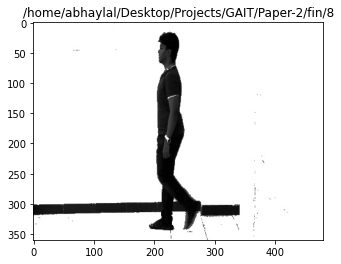

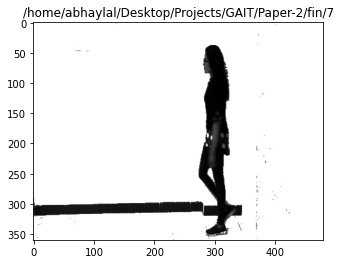

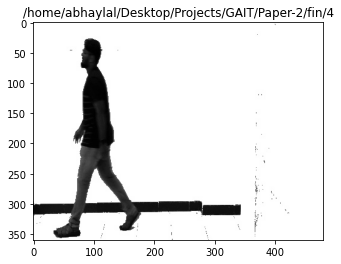

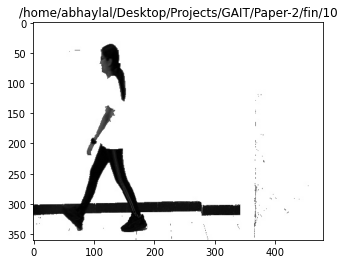

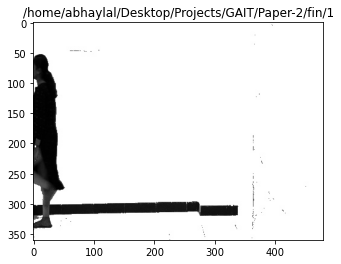

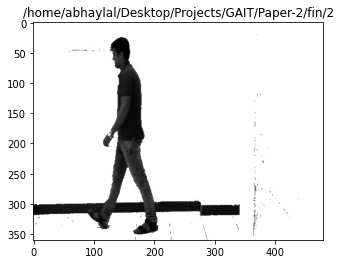

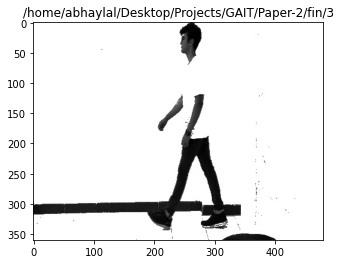

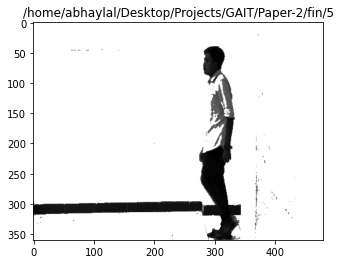

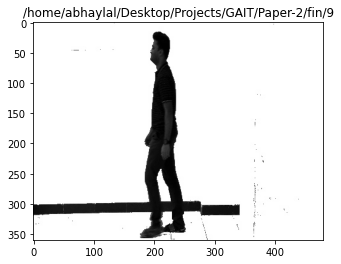

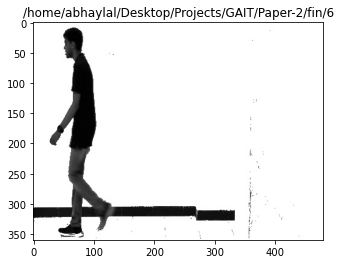

In [5]:
for subdir, dirs, files in os.walk('/home/abhaylal/Desktop/Projects/GAIT/Paper-2/fin'):
    for file in files:
        img_file = subdir + '/' + file
        image = load_img(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [6]:

"""
rootdir= '/home/abhaylal/Desktop/Projects/GAIT/Paper-2/dataFinal' #path of the original folder
classes = ['1','2','3','4','5','6','7','8','9','10'] #total labels
"""


"\nrootdir= '/home/abhaylal/Desktop/Projects/GAIT/Paper-2/dataFinal' #path of the original folder\nclasses = ['1','2','3','4','5','6','7','8','9','10'] #total labels\n"

In [7]:
"""
for i in classes:
    print(i)
    os.makedirs(rootdir +'/train/' + i)

    os.makedirs(rootdir +'/test/' + i)

    source = rootdir + '/' + i

    allFileNames = os.listdir(source)

    np.random.shuffle(allFileNames)

    test_ratio = 0.25

    train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                        [int(len(allFileNames)* (1 - test_ratio))])

    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
        shutil.copy(name, rootdir +'/train/' + i)

    for name in test_FileNames:
        shutil.copy(name, rootdir +'/test/' + i)
        """

"\nfor i in classes:\n    print(i)\n    os.makedirs(rootdir +'/train/' + i)\n\n    os.makedirs(rootdir +'/test/' + i)\n\n    source = rootdir + '/' + i\n\n    allFileNames = os.listdir(source)\n\n    np.random.shuffle(allFileNames)\n\n    test_ratio = 0.25\n\n    train_FileNames, test_FileNames = np.split(np.array(allFileNames),\n                                                        [int(len(allFileNames)* (1 - test_ratio))])\n\n    train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]\n    test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]\n\n    for name in train_FileNames:\n        shutil.copy(name, rootdir +'/train/' + i)\n\n    for name in test_FileNames:\n        shutil.copy(name, rootdir +'/test/' + i)\n        "

In [8]:
train_data_dir  = '/home/abhaylal/Desktop/Projects/GAIT/train'
test_data_dir = '/home/abhaylal/Desktop/Projects/GAIT/test'

In [9]:
os.listdir(train_data_dir)

['8', '7', '4', '10', '1', '2', '3', '5', '9', '6']

Text(0.5, 1.0, 'Number of training images per category:')

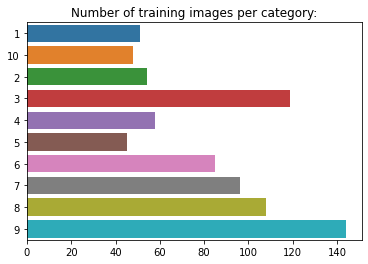

In [10]:
category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '/home/abhaylal/Desktop/Projects/GAIT/train' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

Text(0.5, 1.0, 'Number of training images per category:')

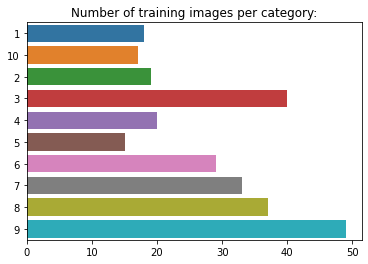

In [11]:
category_names = sorted(os.listdir(test_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = '//home/abhaylal/Desktop/Projects/GAIT/test' + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [12]:
img_height=120
img_width=160

In [13]:
batch_size = 8
train_datagen =  ImageDataGenerator(rescale=1./255) 

test_datagen =  ImageDataGenerator(rescale=1./255)

print('Total number of images for "training":')
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size=batch_size,
class_mode = "categorical",
shuffle=False
)

print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size=batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 808 images belonging to 10 classes.
Total number of images for "testing":
Found 277 images belonging to 10 classes.


In [14]:
input_shape = (img_width, img_height, 3)

In [15]:
input_shape

(160, 120, 3)

In [16]:
# import dense from tensorflow
from tensorflow.keras.layers import Dense

In [17]:
model = models.Sequential()

model.add(Conv2D(64 ,(3, 3),input_shape=input_shape, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dense(10, activation='softmax'))

2023-03-19 23:28:24.370298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 23:28:24.375635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 23:28:24.375779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-19 23:28:24.376303: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
test_generator.class_indices

{'1': 0,
 '10': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [20]:
train_generator

In [21]:
history = model.fit(train_generator, epochs=30)

Epoch 1/30


2023-03-19 22:57:36.538671: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2023-03-19 22:57:37.410882: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-19 22:57:37.412829: W tensorflow/core/framework/op_kernel.cc:1733] INVALID_ARGUMENT: required broadcastable shapes


InvalidArgumentError: Graph execution error:

Detected at node 'Equal' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/home/abhaylal/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/abhaylal/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_114678/1536682476.py", line 1, in <cell line: 1>
      history = model.fit(train_generator, epochs=30)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/metrics/base_metric.py", line 646, in update_state
      matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/metrics/metrics.py", line 3327, in sparse_categorical_accuracy
      matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/home/abhaylal/.local/lib/python3.10/site-packages/keras/utils/metrics_utils.py", line 893, in sparse_categorical_matches
      matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())
Node: 'Equal'
required broadcastable shapes
	 [[{{node Equal}}]] [Op:__inference_train_function_869]

In [ ]:
tf.config.list_physical_devices('GPU')

In [ ]:
tf.test.is_gpu_available(cuda_only=True)
tf.test.is_gpu_available(True, (3,0))

In [ ]:
# perform feature extraction
features = model.predict(test_generator)

In [ ]:
features

In [18]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array

In [38]:
def image_feature():
    folder = "/home/abhaylal/Desktop/Projects/GAIT/train/1"
    features = [];
    img_name = [];
    for count,filename in enumerate(os.listdir(folder)):
        try:
            img=image.load_img((folder+filename),target_size=(360,480))
            x = img_to_array(img)
            x=np.expand_dims(x,axis=0)
            x=preprocess_input(x)
            feat=model.predict(x)
            print(feat)
            feat=feat.flatten()
            features.append(feat)
            img_name.append(filename)
            print(features,img_name)
        except:
            pass
    return features,img_name

In [39]:
img_features,img_name=image_feature()

In [40]:
img_features


[]

In [ ]:
"""AssertionError
base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable=False
input_shape = (img_width, img_height, 3)

In [ ]:
from tensorflow.keras.applications.convnext import ConvNeXtTiny

In [ ]:
# define base model as mobilenetv3small 
base_model = MobileNetV3Large(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable=False
input_shape = (img_width, img_height, 3)


In [ ]:
# import inceptionv3
from tensorflow.keras.applications.inception_v3 import InceptionV3
# define inceptionv3 
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable=False
input_shape = (img_width, img_height, 3)


In [ ]:
# base model as vgg16
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg', input_shape = (img_width, img_height, 3))

In [ ]:
for layer in base_model.layers:
    layer.trainable=False
input_shape = (img_width, img_height, 3)

In [ ]:
model = models.Sequential()
#model.add(Conv2D(32 ,(3, 3),input_shape=input_shape, padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
model.add(base_model)
model.add(Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator, epochs=50)

In [ ]:
model.save('inc3pt.h5')


In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,len(acc)+1)
plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.savefig('train_acc.jpeg')
plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.title('Training loss')
plt.legend()
plt.savefig('train_loss.jpeg')

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['test_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('val_loss.jpeg')

In [ ]:
import itertools
classes = list(test_generator.class_indices.keys())
print('Classes: '+str(classes))
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm,decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.jpeg')
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
np.mean(history.history['accuracy'])


In [ ]:
score = model.evaluate_generator(train_generator,steps=3)
print('Train loss:',score[0])
print('Train accuracy:',score[1])

In [ ]:
score = model.evaluate_generator(test_generator,steps=3)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

In [ ]:
tf.keras.utils.plot_model(model,to_file='inc3pt-mod.png',show_shapes=True, show_layer_names=True)

In [ ]:
# import keras load model
from tensorflow.keras.models import load_model
from tensorflow.keras.utils.vis_utils import plot_model

In [ ]:
# load keras model
model = load_model('custom.h5')


In [ ]:
# summarize model.  
model.summary()

In [ ]:
!pip install pydot

In [ ]:

!pip install graphviz

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.utils.plot_model(model,to_file='cnn-mod.png',show_shapes=True, show_layer_names=True)

In [ ]:
pip install visualkeras

In [ ]:
from PIL import ImageFont


In [ ]:
import visualkeras
visualkeras.layered_view(model,legend=True,to_file="mod-vis.png", draw_volume=True)


In [ ]:
font = ImageFont.truetype("/home/abhaylal/Desktop/Projects/GAIT/arial.ttf", 50)


In [ ]:
visualkeras.layered_view(model,font=font, to_file="mod-vis.png",legend=True,spacing=90)


In [ ]:
score = model.evaluate(train_generator,steps=3)
print('Train loss:',score[0])
print('Train accuracy:',score[1])

In [ ]:
score = model.evaluate_generator(test_generator,steps=3)
print('Test loss:',score[0])
print('Test accuracy:',score[1])